#### Concentration

In [1]:

# NumCosmo

from numcosmo_py import Nc, Ncm
from numcosmo_py.ccl.nc_ccl import create_nc_obj
import nc_concentration

# CCL

import pyccl as ccl

# Colossus

from colossus.cosmology import cosmology
from colossus.halo import concentration

import sys
import numpy as np
import math
import matplotlib.pyplot as plt

Set Cosmology

In [2]:
Omega_c = 0.262
Omega_b = 0.049
Omega_k = 0.0
H0 = 67.66
Tcmb0 = 2.7255
A_s = 2.1e-9
sigma8 = 0.8277
n_s = 0.96
Neff = 0.0
w0 = -1.0
wa = 0.0

In [6]:
# Colossus Cosmology
params=dict(H0 = H0, Om0 = (Omega_c+Omega_b), Ob0 = Omega_b, Tcmb0 = Tcmb0, Neff = Neff, sigma8 = sigma8, ns = n_s, w0=w0, wa=wa)
cosmo_col = cosmology.setCosmology("mycosmo", params)
cosmology.setCurrent(cosmo_col)

# CCL Cosmology
ccl_cosmo = ccl.Cosmology(
    Omega_c=Omega_c,
    Omega_b=Omega_b,
    Neff=Neff,
    h=H0/100.0,
    sigma8=sigma8,
    n_s=n_s,
    Omega_k=Omega_k,
    w0=w0,
    wa=wa,
    T_CMB=Tcmb0,
    m_nu=[0.00, 0.0, 0.0],
    transfer_function="eisenstein_hu",
    matter_power_spectrum="linear",
)

# NumCosmo Cosmology
Ncm.cfg_init()
Ncm.cfg_set_log_handler(lambda msg: sys.stdout.write(msg) and sys.stdout.flush())
nc_cosmo = create_nc_obj(ccl_cosmo)
cosmo = nc_cosmo.cosmo

In [5]:
def cmp_double(desc, m1, m2, x1, x2):
    print(
        "%s: %s = % 22.15g, %s = % 22.15g, CMP: %9.2e"
        % (desc, m1, x1, m2, x2, math.fabs(x1 / x2 - 1.0))
    )

Set parameters

In [7]:
M_array = 10**np.linspace(13, 15, 100)
M = 1E14
z = 1.0
mdef = '200c'
M_col = M * cosmo.h()
Marray_col = M_array * cosmo.h()
a = 1.0 / (1.0 + z)

In [8]:
# NumCosmo concentration
nc_b01 = nc_concentration.bullock_maccio(M, z, mdef, cosmo)
nc_d08 = nc_concentration.duffy08(M, z, mdef, cosmo)
nc_k11 = nc_concentration.klypin11(M, z, 'vir', cosmo)
nc_p12 = nc_concentration.prada12(M, z, mdef, cosmo)
nc_b13 = nc_concentration.bhattacharya13(M, z, mdef, cosmo)
nc_d14 = nc_concentration.dutton14(M, z, mdef, cosmo)
nc_d15 = nc_concentration.diemer15(M, z, mdef, cosmo)
nc_k16 = nc_concentration.klypin16(M, z, mdef, cosmo)
nc_c18 = nc_concentration.child18(M, z, mdef, cosmo)
nc_d19 = nc_concentration.diemer19(M, z, mdef, cosmo)
nc_i21 = nc_concentration.ishiyama21(M, z, mdef, cosmo)

#Colossus concentration
col_b01 = concentration.concentration(M_col, mdef, z, 'bullock01')
col_d08 = concentration.concentration(M_col, mdef, z, 'duffy08')
col_k11 = concentration.concentration(M_col, 'vir', z, 'klypin11')
col_p12 = concentration.concentration(M_col, mdef, z, 'prada12')
col_b13 = concentration.concentration(M_col, mdef, z, 'bhattacharya13')
col_d14 = concentration.concentration(M_col, mdef, z, 'dutton14')
col_d15 = concentration.concentration(M_col, mdef, z, 'diemer15')
col_k16 = concentration.concentration(M_col, mdef, z, 'klypin16_nu')
col_c18 = concentration.concentration(M_col, mdef, z, 'child18')
col_d19 = concentration.concentration(M_col, mdef, z, 'diemer19')
col_i21 = concentration.concentration(M_col, mdef, z, 'ishiyama21')

# CCL concentration
d08 = ccl.halos.ConcentrationDuffy08(mass_def = mdef)
ccl_d08 = d08(ccl_cosmo, M, a)
k11 = ccl.halos.ConcentrationKlypin11(mass_def = 'vir')
ccl_k11 = k11(ccl_cosmo, M, a)
p12 = ccl.halos.ConcentrationPrada12(mass_def = mdef)
ccl_p12 = p12(ccl_cosmo, M, a)
b13 = ccl.halos.ConcentrationBhattacharya13(mass_def = mdef)
ccl_b13 = b13(ccl_cosmo, M, a)
d15 = ccl.halos.ConcentrationDiemer15(mass_def = mdef)
ccl_d15 = d15(ccl_cosmo, M, a)
i21 = ccl.halos.ConcentrationIshiyama21(mass_def = mdef)
ccl_i21 = i21(ccl_cosmo, M, a)

/home/thais/bdiemer-colossus-166b17542ba9/colossus/halo/concentration.py:442: UserWarning: Some masses or redshifts are outside the validity of the concentration model.
  warnings.warn('Some masses or redshifts are outside the validity of the concentration model.')


In [9]:
cmp_double("B01", "NumCosmo", "Colossus", nc_b01, col_b01)
cmp_double("D08", "NumCosmo", "Colossus", nc_d08, col_d08)
cmp_double("K11", "NumCosmo", "Colossus", nc_k11, col_k11)
cmp_double("P12", "NumCosmo", "Colossus", nc_p12, col_p12)
cmp_double("B13", "NumCosmo", "Colossus", nc_b13, col_b13)
cmp_double("D14", "NumCosmo", "Colossus", nc_d14, col_d14)
cmp_double("D15", "NumCosmo", "Colossus", nc_d15, col_d15)
cmp_double("K16", "NumCosmo", "Colossus", nc_k16, col_k16)
cmp_double("C18", "NumCosmo", "Colossus", nc_c18, col_c18)
cmp_double("D19", "NumCosmo", "Colossus", nc_d19, col_d19)
cmp_double("I21", "NumCosmo", "Colossus", nc_i21, col_i21)

B01: NumCosmo =       3.23543534531755, Colossus =       3.23482455191326, CMP:  1.89e-04
D08: NumCosmo =       3.06683663482408, Colossus =       3.06683663482408, CMP:  0.00e+00
K11: NumCosmo =       6.99836087710806, Colossus =       6.99836087710806, CMP:  0.00e+00
P12: NumCosmo =       4.82636118001972, Colossus =       4.82634895589876, CMP:  2.53e-06
B13: NumCosmo =       3.18885943309939, Colossus =       3.18870727679655, CMP:  4.77e-05
D14: NumCosmo =       3.89453819722885, Colossus =       3.89453819722885, CMP:  0.00e+00
D15: NumCosmo =       3.59928875762467, Colossus =         3.576413459751, CMP:  6.40e-03
K16: NumCosmo =         3.641790390682, Colossus =       3.64183311707057, CMP:  1.17e-05
C18: NumCosmo =       3.42725417936248, Colossus =        3.4273310941726, CMP:  2.24e-05
D19: NumCosmo =       3.69784670161885, Colossus =       3.69900816384166, CMP:  3.14e-04
I21: NumCosmo =       3.70471060187403, Colossus =       3.70381099102462, CMP:  2.43e-04


In [10]:
cmp_double("D08", "NumCosmo", "CCL     ", nc_d08, ccl_d08)
cmp_double("K11", "NumCosmo", "CCL     ", nc_k11, ccl_k11)
cmp_double("P12", "NumCosmo", "CCL     ", nc_p12, ccl_p12)
cmp_double("B13", "NumCosmo", "CCL     ", nc_b13, ccl_b13)
cmp_double("D15", "NumCosmo", "CCL     ", nc_d15, ccl_d15)
cmp_double("I21", "NumCosmo", "CCL     ", nc_i21, ccl_i21)

D08: NumCosmo =       3.06683663482408, CCL      =       3.06683663482408, CMP:  0.00e+00
K11: NumCosmo =       6.99836087710806, CCL      =       6.99836087710806, CMP:  0.00e+00
P12: NumCosmo =       4.82636118001972, CCL      =       4.82635910612504, CMP:  4.30e-07
B13: NumCosmo =       3.18885943309939, CCL      =       3.18985755985776, CMP:  3.13e-04
D15: NumCosmo =       3.59928875762467, CCL      =       3.59919710860202, CMP:  2.55e-05
I21: NumCosmo =       3.70471060187403, CCL      =       3.70501149397545, CMP:  8.12e-05


In [11]:
# NumCosmo
nc_b01a = nc_concentration.bullock_maccio(M_array, z, mdef, cosmo)
nc_d08a = nc_concentration.duffy08(M_array, z, mdef, cosmo)
nc_k11a = nc_concentration.klypin11(M_array, z, 'vir', cosmo)
nc_p12a = nc_concentration.prada12(M_array, z, mdef, cosmo)
nc_b13a = nc_concentration.bhattacharya13(M_array, z, mdef, cosmo)
nc_d14a = nc_concentration.dutton14(M_array, z, mdef, cosmo)
nc_d15a = nc_concentration.diemer15(M_array, z, mdef, cosmo)
nc_k16a = nc_concentration.klypin16(M_array, z, mdef, cosmo)
nc_c18a = nc_concentration.child18(M_array, z, mdef, cosmo)
nc_d19a = nc_concentration.diemer19(M_array, z, mdef, cosmo)
nc_i21a = nc_concentration.ishiyama21(M_array, z, mdef, cosmo)

#Colossus
col_b01a = concentration.concentration(Marray_col, mdef, z, 'bullock01')
col_d08a = concentration.concentration(Marray_col, mdef, z, 'duffy08')
col_k11a = concentration.concentration(Marray_col, 'vir', z, 'klypin11')
col_p12a = concentration.concentration(Marray_col, mdef, z, 'prada12')
col_b13a = concentration.concentration(Marray_col, mdef, z, 'bhattacharya13')
col_d14a = concentration.concentration(Marray_col, mdef, z, 'dutton14')
col_d15a = concentration.concentration(Marray_col, mdef, z, 'diemer15')
col_k16a = concentration.concentration(Marray_col, mdef, z, 'klypin16_nu')
col_c18a = concentration.concentration(Marray_col, mdef, z, 'child18')
col_d19a = concentration.concentration(Marray_col, mdef, z, 'diemer19')
col_i21a = concentration.concentration(Marray_col, mdef, z, 'ishiyama21')

# CCL
d08a = ccl.halos.ConcentrationDuffy08(mass_def = mdef)
ccl_d08a = d08a(ccl_cosmo, M_array, a)
k11a = ccl.halos.ConcentrationKlypin11(mass_def = 'vir')
ccl_k11a = k11a(ccl_cosmo, M_array, a)
p12a = ccl.halos.ConcentrationPrada12(mass_def = mdef)
ccl_p12a = p12a(ccl_cosmo, M_array, a)
b13a = ccl.halos.ConcentrationBhattacharya13(mass_def = mdef)
ccl_b13a = b13a(ccl_cosmo, M_array, a)
d15a = ccl.halos.ConcentrationDiemer15(mass_def = mdef)
ccl_d15a = d15a(ccl_cosmo, M_array, a)
i21a = ccl.halos.ConcentrationIshiyama21(mass_def = mdef)
ccl_i21a = i21a(ccl_cosmo, M_array, a)

<Figure size 640x480 with 0 Axes>

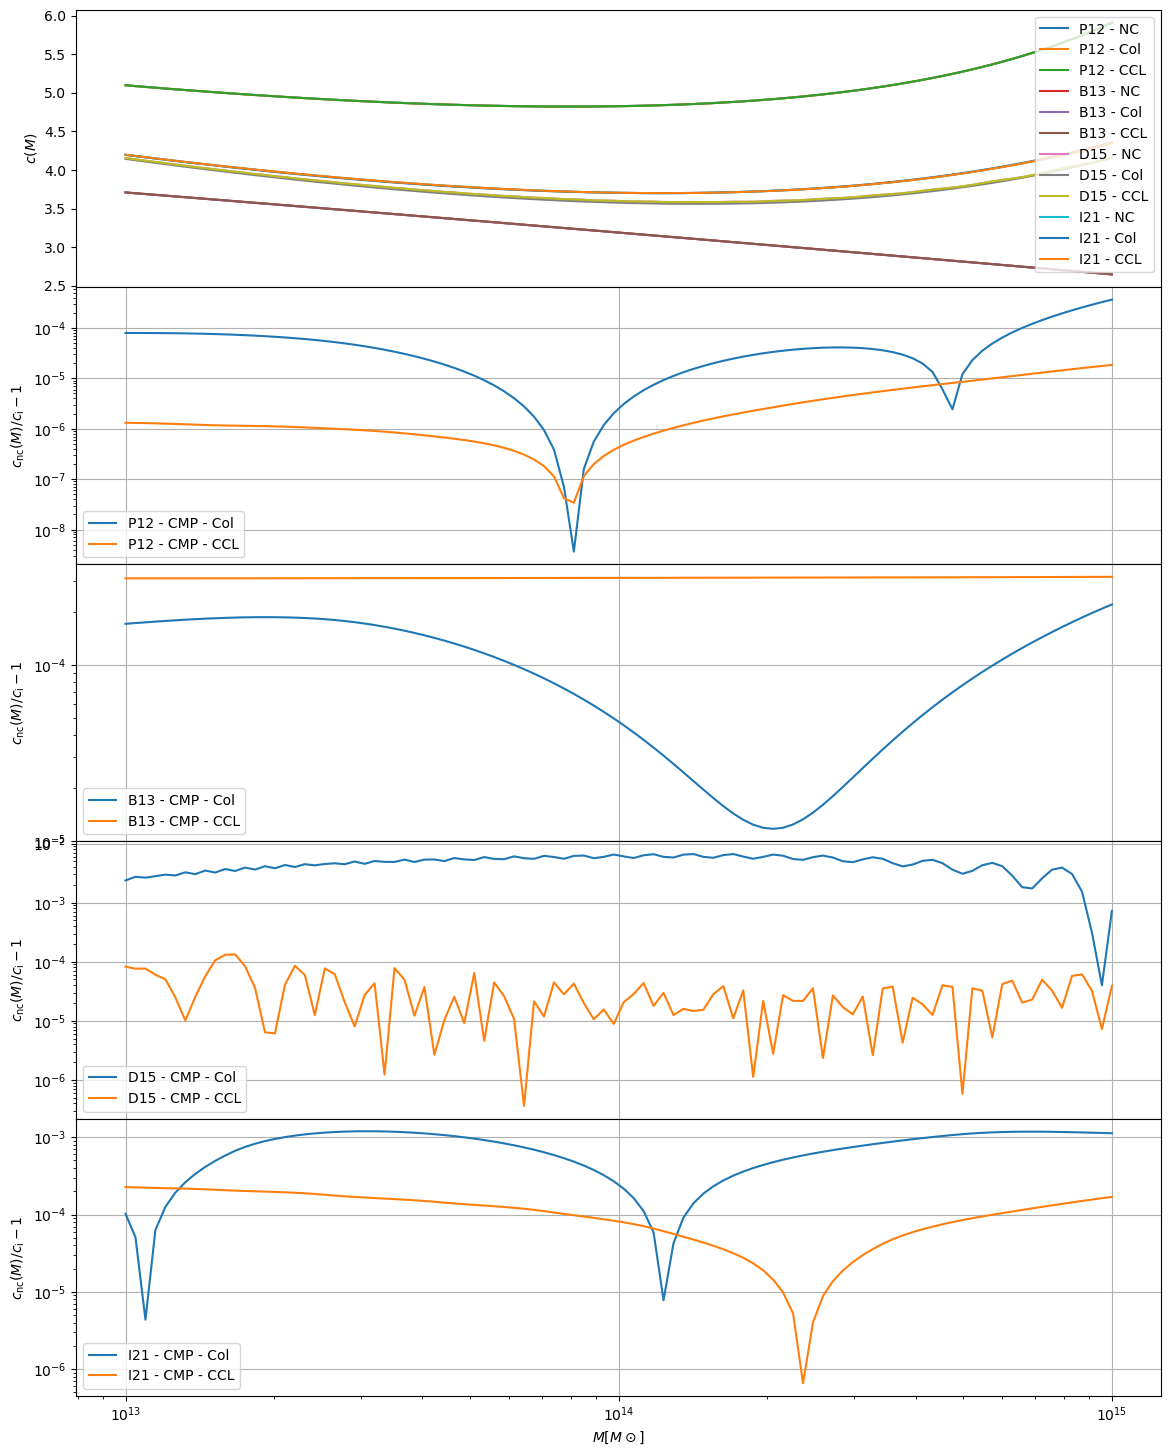

In [12]:
plt.figure()
fig, axs = plt.subplots(5, sharex=True, gridspec_kw={"hspace": 0}, figsize=(14, 18))

axs[0].set_xscale("log")
#axs[0].set_yscale("log")
axs[1].set_yscale("log")
axs[1].set_xlabel(r"$M[M\odot]$")
axs[2].set_yscale("log")
axs[2].set_xlabel(r"$M[M\odot]$")
axs[2].set_ylabel(r"$c_{\mathrm{nc}} (M) / c_{\mathrm{i}} - 1$")
axs[3].set_yscale("log")
axs[3].set_xlabel(r"$M[M\odot]$")
axs[3].set_ylabel(r"$c_{\mathrm{nc}} (M) / c_{\mathrm{i}} - 1$")
axs[4].set_yscale("log")
axs[4].set_xlabel(r"$M[M\odot]$")
axs[4].set_ylabel(r"$c_{\mathrm{nc}} (M) / c_{\mathrm{i}} - 1$")
axs[0].set_ylabel(r"$c (M)$")
axs[1].set_ylabel(r"$c_{\mathrm{nc}} (M) / c_{\mathrm{i}} - 1$")
axs[0].plot(M_array, nc_p12a, "-", label="P12 - NC")
axs[0].plot(M_array, col_p12a, "-", label="P12 - Col")
axs[0].plot(M_array, ccl_p12a, "-", label="P12 - CCL")
axs[0].plot(M_array, nc_b13a, "-", label="B13 - NC")
axs[0].plot(M_array, col_b13a, "-", label="B13 - Col")
axs[0].plot(M_array, ccl_b13a, "-", label="B13 - CCL")
axs[0].plot(M_array, nc_d15a, "-", label="D15 - NC")
axs[0].plot(M_array, col_d15a, "-", label="D15 - Col")
axs[0].plot(M_array, ccl_d15a, "-", label="D15 - CCL")
axs[0].plot(M_array, nc_i21a, "-", label="I21 - NC")
axs[0].plot(M_array, col_i21a, "-", label="I21 - Col")
axs[0].plot(M_array, ccl_i21a, "-", label="I21 - CCL")
axs[1].plot(M_array, np.abs(nc_p12a / col_p12a - 1.0), "-", label="P12 - CMP - Col")
axs[1].plot(M_array, np.abs(nc_p12a / ccl_p12a - 1.0), "-", label="P12 - CMP - CCL")
axs[2].plot(M_array, np.abs(nc_b13a / col_b13a - 1.0), "-", label="B13 - CMP - Col")
axs[2].plot(M_array, np.abs(nc_b13a / ccl_b13a - 1.0), "-", label="B13 - CMP - CCL")
axs[3].plot(M_array, np.abs(nc_d15a / col_d15a - 1.0), "-", label="D15 - CMP - Col")
axs[3].plot(M_array, np.abs(nc_d15a / ccl_d15a - 1.0), "-", label="D15 - CMP - CCL")
axs[4].plot(M_array, np.abs(nc_i21a / col_i21a - 1.0), "-", label="I21 - CMP - Col")
axs[4].plot(M_array, np.abs(nc_i21a / ccl_i21a - 1.0), "-", label="I21 - CMP - CCL")

axs[0].legend(loc="best")
axs[1].legend(loc="best")
axs[1].grid()
axs[2].legend(loc="best")
axs[2].grid()
axs[3].legend(loc="best")
axs[3].grid()
axs[4].legend(loc="best")
axs[4].grid()

plt.show()

<Figure size 640x480 with 0 Axes>

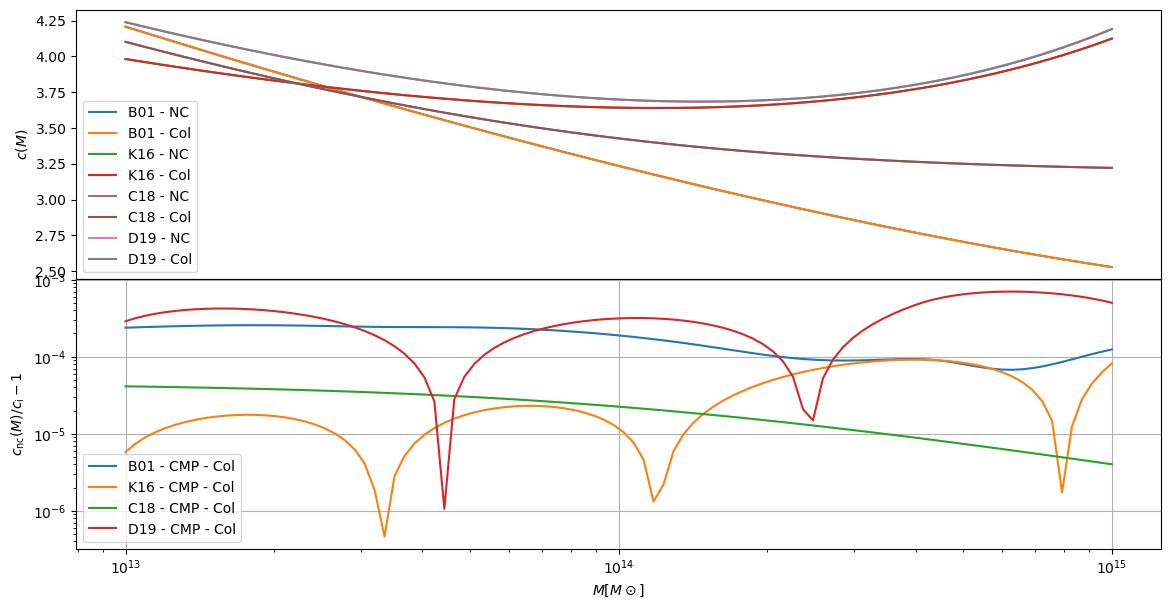

In [13]:
plt.figure()
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={"hspace": 0}, figsize=(14, 7))

axs[0].set_xscale("log")
#axs[0].set_yscale("log")
axs[1].set_yscale("log")
axs[1].set_xlabel(r"$M[M\odot]$")
axs[0].set_ylabel(r"$c (M)$")
axs[1].set_ylabel(r"$c_{\mathrm{nc}} (M) / c_{\mathrm{i}} - 1$")
axs[0].plot(M_array, nc_b01a, "-", label="B01 - NC")
axs[0].plot(M_array, col_b01a, "-", label="B01 - Col")
axs[0].plot(M_array, nc_k16a, "-", label="K16 - NC")
axs[0].plot(M_array, col_k16a, "-", label="K16 - Col")
axs[0].plot(M_array, nc_c18a, "-", label="C18 - NC")
axs[0].plot(M_array, col_c18a, "-", label="C18 - Col")
axs[0].plot(M_array, nc_d19a, "-", label="D19 - NC")
axs[0].plot(M_array, col_d19a, "-", label="D19 - Col")
axs[1].plot(M_array, np.abs(nc_b01a / col_b01a - 1.0), "-", label="B01 - CMP - Col")
axs[1].plot(M_array, np.abs(nc_k16a / col_k16a - 1.0), "-", label="K16 - CMP - Col")
axs[1].plot(M_array, np.abs(nc_c18a / col_c18a - 1.0), "-", label="C18 - CMP - Col")
axs[1].plot(M_array, np.abs(nc_d19a / col_d19a - 1.0), "-", label="D19 - CMP - Col")

axs[0].legend(loc="best")
axs[1].legend(loc="best")
axs[1].grid()

plt.show()

In [14]:
sigma = nc_concentration.sigmafunc(M_array, z, cosmo)
nu = 1.686 / sigma

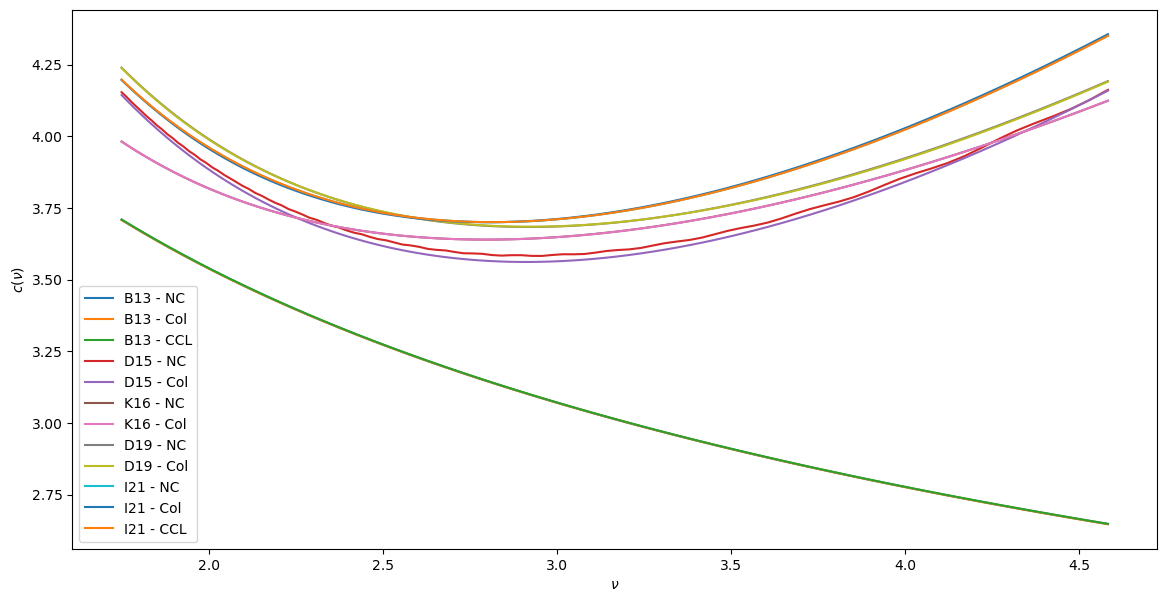

In [15]:
plt.figure(figsize=(14, 7))

plt.xlabel(r"$\nu$")
plt.ylabel(r"$c(\nu)$")
plt.plot(nu, nc_b13a, "-", label="B13 - NC")
plt.plot(nu, col_b13a, "-", label="B13 - Col")
plt.plot(nu, ccl_b13a, "-", label="B13 - CCL")
plt.plot(nu, nc_d15a, "-", label="D15 - NC")
plt.plot(nu, col_d15a, "-", label="D15 - Col")
plt.plot(nu, nc_k16a, "-", label="K16 - NC")
plt.plot(nu, col_k16a, "-", label="K16 - Col")
plt.plot(nu, nc_d19a, "-", label="D19 - NC")
plt.plot(nu, col_d19a, "-", label="D19 - Col")
plt.plot(nu, nc_i21a, "-", label="I21 - NC")
plt.plot(nu, col_i21a, "-", label="I21 - Col")
plt.plot(nu, ccl_i21a, "-", label="I21 - CCL")

plt.legend(loc="best")


plt.show()

In [19]:
M_array = np.linspace(12, 15, 100)

# NumCosmo

nc_duffy = []

for m in M_array:
    cmr_Duffy08_array = Nc.HaloCMDuffy08.new(Nc.HaloMassSummaryMassDef.CRITICAL, 200)
    cmr_Duffy08_array.param_set_by_name("log10MDelta", m)
    nc_duffy.append(cmr_Duffy08_array.concentration(cosmo, z))

nc_klypin = []

for m in M_array:
    cmr_Klypin11_array = Nc.HaloCMKlypin11.new(Nc.HaloMassSummaryMassDef.VIRIAL, 200)
    cmr_Klypin11_array.param_set_by_name("log10MDelta", m)
    nc_klypin.append(cmr_Klypin11_array.concentration(cosmo, 0.0))  

# Colossus
col_d08_array = concentration.concentration(10**M_array * cosmo_col.h, "200c", z, 'duffy08')
col_k11_array = concentration.concentration(10**M_array * cosmo_col.h, "vir", 0.0, 'klypin11')

# CCL
d08_array = ccl.halos.ConcentrationDuffy08(mass_def = "200c")
ccl_d08_array = d08_array(ccl_cosmo, 10**M_array, a)

k11_array = ccl.halos.ConcentrationKlypin11(mass_def = "vir")
ccl_k11_array = k11_array(ccl_cosmo, 10**M_array, a)

/home/thais/bdiemer-colossus-166b17542ba9/colossus/halo/concentration.py:442: UserWarning: Some masses or redshifts are outside the validity of the concentration model.
  warnings.warn('Some masses or redshifts are outside the validity of the concentration model.')


<Figure size 640x480 with 0 Axes>

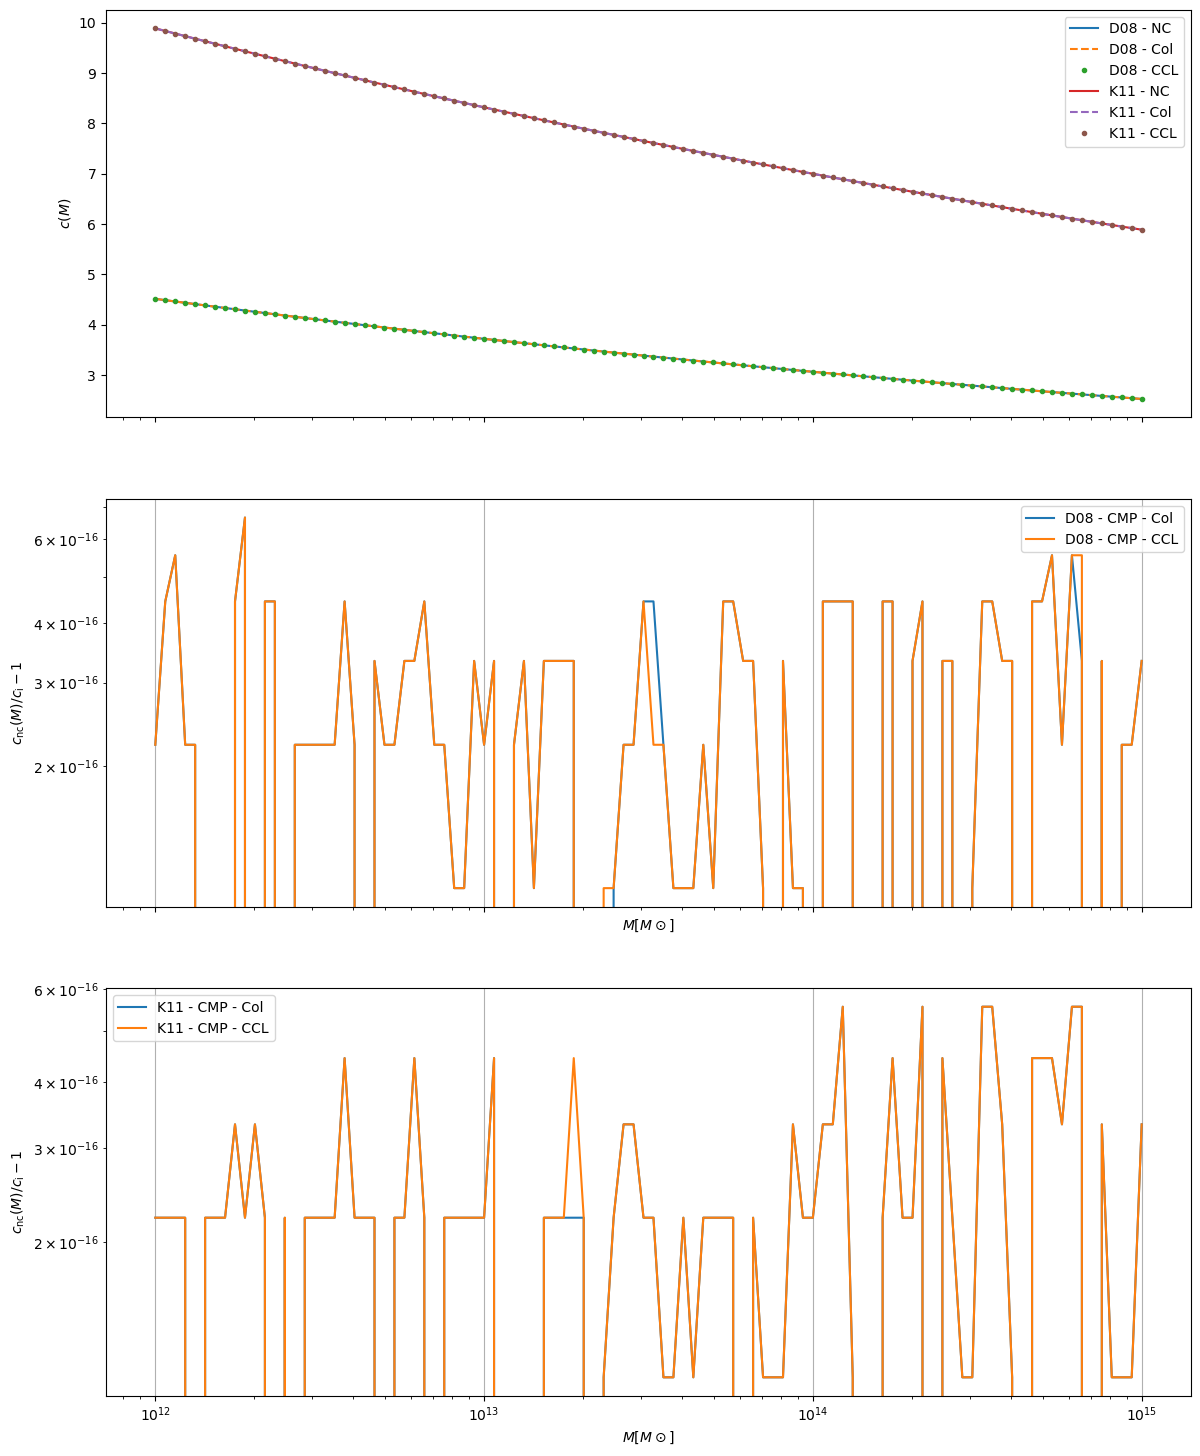

In [24]:
plt.figure()
fig, axs = plt.subplots(3, sharex=True, figsize=(14, 18))

axs[0].set_xscale("log")
#axs[0].set_yscale("log")
axs[1].set_yscale("log")
axs[1].set_xlabel(r"$M[M\odot]$")
axs[0].set_ylabel(r"$c (M)$")
axs[1].set_ylabel(r"$c_{\mathrm{nc}} (M) / c_{\mathrm{i}} - 1$")
axs[0].plot(10**M_array, nc_duffy, "-", label="D08 - NC")
axs[0].plot(10**M_array, col_d08_array, "--", label="D08 - Col")
axs[0].plot(10**M_array, ccl_d08_array, ".", label="D08 - CCL")
axs[0].plot(10**M_array, nc_klypin, "-", label="K11 - NC")
axs[0].plot(10**M_array, col_k11_array, "--", label="K11 - Col")
axs[0].plot(10**M_array, ccl_k11_array, ".", label="K11 - CCL")
axs[2].set_yscale("log")
axs[2].set_xlabel(r"$M[M\odot]$")
axs[2].set_ylabel(r"$c_{\mathrm{nc}} (M) / c_{\mathrm{i}} - 1$")

axs[1].plot(10**M_array, np.abs(nc_duffy / col_d08_array - 1.0), "-", label="D08 - CMP - Col")
axs[1].plot(10**M_array, np.abs(nc_duffy / ccl_d08_array - 1.0), "-", label="D08 - CMP - CCL")

axs[2].plot(10**M_array, np.abs(nc_klypin / col_k11_array - 1.0), "-", label="K11 - CMP - Col")
axs[2].plot(10**M_array, np.abs(nc_klypin / ccl_k11_array - 1.0), "-", label="K11 - CMP - CCL")


axs[0].legend(loc="best")
axs[1].legend(loc="best")
axs[2].legend(loc="best")
axs[1].grid()
axs[2].grid()


plt.show()